In [1]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    print ("Все библиотеки подключены")
except Exception as e:
    print(e)

Все библиотеки подключены


In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv", encoding = 'utf-8')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
print(df.dtypes)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


Комментарий. Так как колонка 'Blood Pressure' имеет нечисловой формат, добавим две колонки 'Systolic' и 'Diastolic' для хранения систолического и диастолического артериального давления. 

In [5]:
parts = df['Blood Pressure'].str.split('/')
#print(parts)
#print(type(parts))

df['Systolic'] = parts.apply(lambda x: x[0]).astype(int)
df['Diastolic'] = parts.apply(lambda x: x[1]).astype(int)
display(df.dtypes)
df.head(5)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic                     int64
Diastolic                    int64
dtype: object

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


ЗАДАНИЕ. Пропущенные значения:

    найти пропуски (isnull, isna);

    посчитать количество пропусков по столбцам;

    выбрать стратегию заполнения или удаления:

        удаление строк/столбцов;

        заполнение медианой/средним/модой/значениями по группам.


In [6]:
display(df.isna().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
Systolic                     0
Diastolic                    0
dtype: int64

Комментарий. Пропуски присутствуют только в колонке 'Sleep Disorder'. Они означают, что расстройства сна у пациента остуствуют. Заполним такие ячейки значением 'None'. 

Кроме того, в таблице присутствуют четыре категории индекса массы тела: 'Normal' 'Overweight', 'Obese', 'Normal Weight'. Вероятно, 'Normal' и 'Normal weight' означают одну и ту же категорию, поэтому заменим ячейки 'Normal Weight' на 'Normal'.

In [7]:
df = df.fillna('None')
display(df.isna().sum())

df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic                   0
Diastolic                  0
dtype: int64

ЗАДАНИЕ

найти дубликаты (duplicated);

вывести количество дублирующихся строк;

удалить их при необходимости (drop_duplicates).

In [8]:
df.duplicated().sum()

np.int64(0)

Комментарий. Формально дубликаты отсутствуют, однако из начала таблицы видно, что фактически дубликаты есть. Они отличаются только значениями столбца 'Person ID' или 'Sleep Disorder', или (если посмотреть таблицу дальше) 'Occupation'. Отбросим эти строки.

In [9]:
columns_to_check = ['Age', 'Gender', 'Sleep Duration', 'Quality of Sleep', 
                    'Physical Activity Level', 'Stress Level', 'BMI Category', 
                    'Blood Pressure', 'Heart Rate', 'Daily Steps']

dupes = df[df.duplicated(subset=columns_to_check)]

print("\nФактические дубликаты:\n")
display(dupes)


Фактические дубликаты:



,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,140,90
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [10]:
df = df.drop_duplicates(subset=columns_to_check)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,140,90
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,345,Female,57,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
352,353,Female,58,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
358,359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,None,140,95
359,360,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,None,140,95


ЗАДАНИЕ. Выбросы (при необходимости):

    с помощью z-score из numpy;

    визуально (boxplot).

In [11]:
numeric_columns = {'Age', 'Daily Steps', 'Diastolic', 'Heart Rate', 'Physical Activity Level', 'Quality of Sleep',
                   'Sleep Duration', 'Stress Level', 'Systolic'}
for c in numeric_columns:
    mean = df[c].mean()
    std = df[c].std()
    z_scores = (df[c] - mean) / std
    max_z = abs(z_scores).max()
    extreme_values = (abs(z_scores) - 3 > 0).sum()
    print(f"Наибольшее отклонение от среднего в столбце '{c}' составляет {max_z :.2f} сигма; Число выбросов, превышающих 3*сигма, = {extreme_values}")

Наибольшее отклонение от среднего в столбце 'Physical Activity Level' составляет 1.59 сигма; Число выбросов, превышающих 3*сигма, = 0
Наибольшее отклонение от среднего в столбце 'Stress Level' составляет 1.46 сигма; Число выбросов, превышающих 3*сигма, = 0
Наибольшее отклонение от среднего в столбце 'Age' составляет 2.05 сигма; Число выбросов, превышающих 3*сигма, = 0
Наибольшее отклонение от среднего в столбце 'Daily Steps' составляет 2.04 сигма; Число выбросов, превышающих 3*сигма, = 0
Наибольшее отклонение от среднего в столбце 'Diastolic' составляет 1.82 сигма; Число выбросов, превышающих 3*сигма, = 0
Наибольшее отклонение от среднего в столбце 'Sleep Duration' составляет 1.79 сигма; Число выбросов, превышающих 3*сигма, = 0
Наибольшее отклонение от среднего в столбце 'Heart Rate' составляет 2.99 сигма; Число выбросов, превышающих 3*сигма, = 0
Наибольшее отклонение от среднего в столбце 'Quality of Sleep' составляет 2.60 сигма; Число выбросов, превышающих 3*сигма, = 0
Наибольшее отк

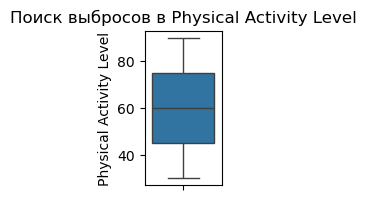

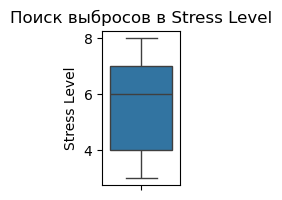

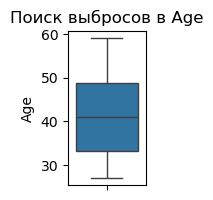

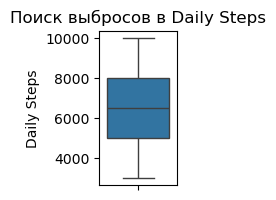

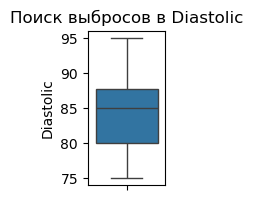

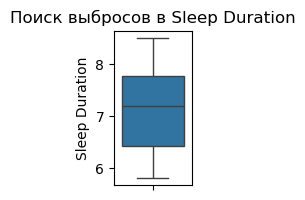

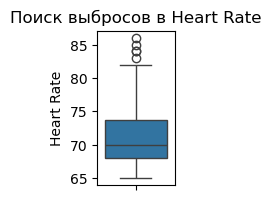

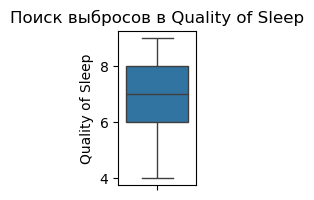

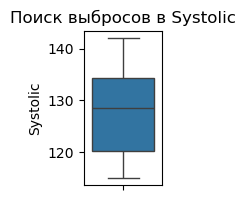

In [12]:
for c in numeric_columns:
    plt.figure(figsize=(1, 2))
    sns.boxplot(y=df[c])
    plt.title(f'Поиск выбросов в {c}')
    plt.show()


Комментарий. Исходя из данных графиков, выбросы наблюдаются только в одном столбце -- 'Heart Rate', однако они не превосходят 3*сигма. Поэтому удалять соответствующие строки не будем.

Комментарий. Сохраним подготовленные данные в csv-файл для анализа в Яндекс Даталенс.

In [13]:
df.to_csv("sleep_and_health_truncated.csv", index=False, encoding="utf-8")

ЗАДАНИЕ. Статистики данных:

описательная статистика (describe);

подсчёт уникальных значений, частоты;

корреляционный анализ (corr).


In [14]:
print(df.describe())

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  106.000000  106.000000      106.000000        106.000000   
mean   170.584906   41.094340        7.106604          7.179245   
std    109.859639    8.721652        0.779654          1.225112   
min      1.000000   27.000000        5.800000          4.000000   
25%     73.500000   33.250000        6.425000          6.000000   
50%    166.500000   41.000000        7.200000          7.000000   
75%    267.500000   48.750000        7.775000          8.000000   
max    361.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  \
count               106.000000    106.000000  106.000000    106.000000   
mean                 57.952830      5.518868   71.216981   6578.301887   
std                  20.132126      1.719530    4.937716   1756.349283   
min                  30.000000      3.000000   65.000000   3000.000000   
25%                  45.00

In [15]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} уникальных значений")

Person ID: 106 уникальных значений
Gender: 2 уникальных значений
Age: 31 уникальных значений
Occupation: 11 уникальных значений
Sleep Duration: 27 уникальных значений
Quality of Sleep: 6 уникальных значений
Physical Activity Level: 16 уникальных значений
Stress Level: 6 уникальных значений
BMI Category: 3 уникальных значений
Blood Pressure: 25 уникальных значений
Heart Rate: 19 уникальных значений
Daily Steps: 20 уникальных значений
Sleep Disorder: 3 уникальных значений
Systolic: 18 уникальных значений
Diastolic: 17 уникальных значений


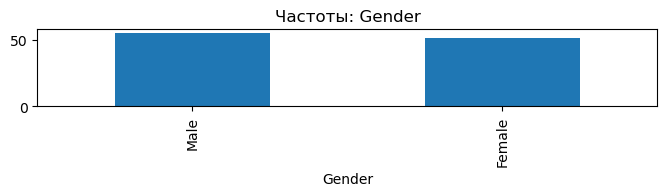

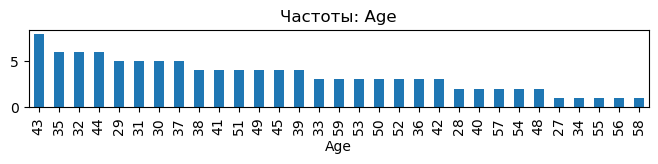

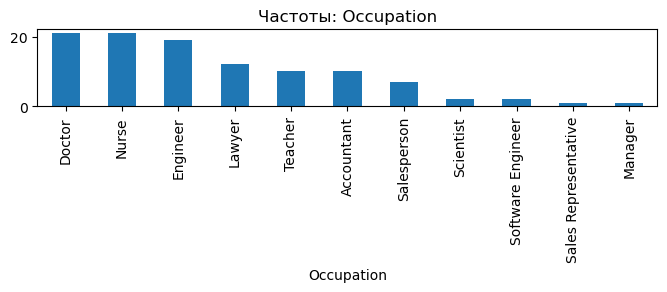

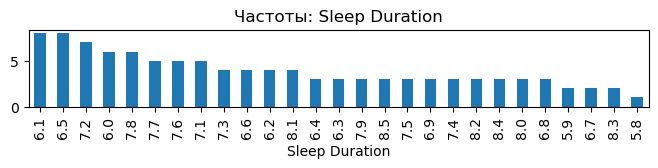

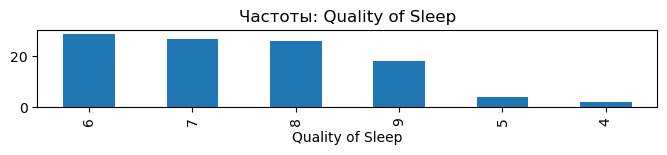

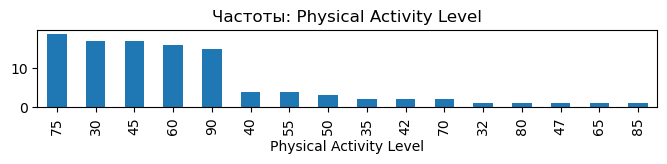

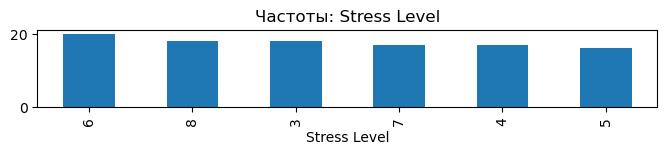

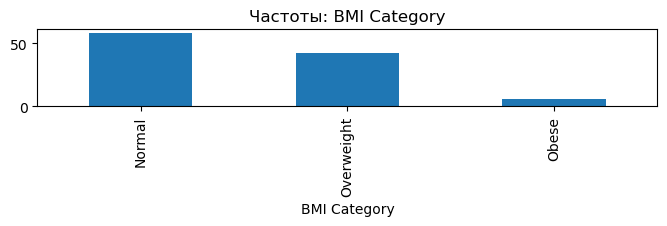

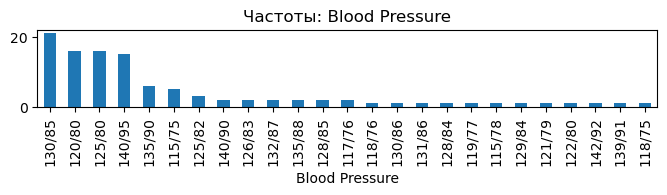

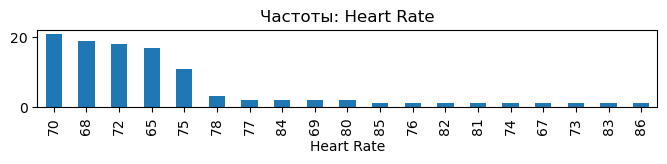

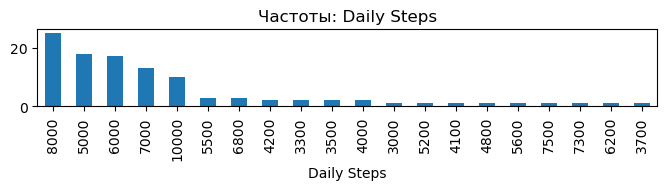

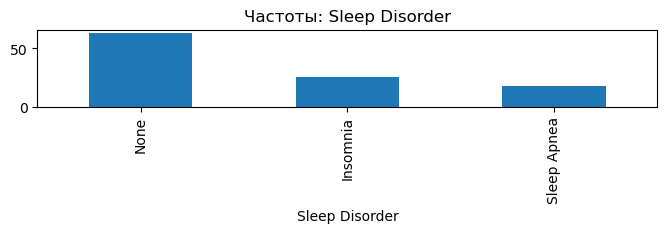

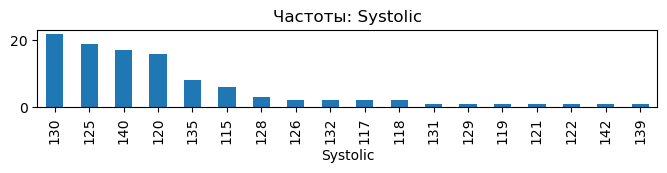

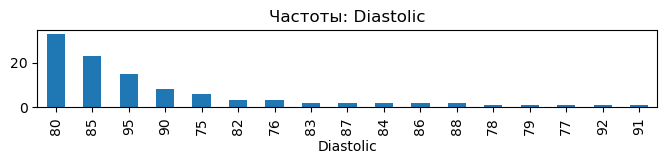

In [16]:
for col in df.columns:
    if col == 'Person ID': continue
    freq = df[col].value_counts()
    plt.figure(figsize=(8, 1))
    freq.plot(kind='bar')
    plt.title(f'Частоты: {col}')
    plt.show()


In [17]:
corr = df[list(numeric_columns)].corr()
display(corr)
#sns.heatmap(corr, annot=True)
plt.show()

,Physical Activity Level,Stress Level,Age,Daily Steps,Diastolic,Sleep Duration,Heart Rate,Quality of Sleep,Systolic
Physical Activity Level,1.000000,-0.082095,0.182490,0.696203,0.306422,0.248732,0.027984,0.247862,0.179298
Stress Level,-0.082095,1.000000,-0.392576,0.142201,0.131060,-0.818112,0.553070,-0.880937,0.134899
Age,0.182490,-0.392576,1.000000,0.079468,0.512755,0.319521,-0.237773,0.468131,0.521166
Daily Steps,0.696203,0.142201,0.079468,1.000000,0.089913,0.005252,-0.289811,0.092560,-0.063674
Diastolic,0.306422,0.131060,0.512755,0.089913,1.000000,-0.234814,0.332203,-0.164133,0.968010
Sleep Duration,0.248732,-0.818112,0.319521,0.005252,-0.234814,1.000000,-0.479076,0.871200,-0.248291
Heart Rate,0.027984,0.553070,-0.237773,-0.289811,0.332203,-0.479076,1.000000,-0.612626,0.377931
Quality of Sleep,0.247862,-0.880937,0.468131,0.092560,-0.164133,0.871200,-0.612626,1.000000,-0.177093
Systolic,0.179298,0.134899,0.521166,-0.063674,0.968010,-0.248291,0.377931,-0.177093,1.000000


ЗАДАНИЕ

C. Визуализация данных

Нужно построить минимум 5 графиков:

гистограммы распределений;

линейный график;

столбчатые диаграммы;

boxplot;

heatmap корреляций.

Можно использовать:
matplotlib, seaborn, plotly.

D. Группировки и агрегации

Нужно применить группировки (groupby) и выполнить минимум 3 вида агрегаций:

Примеры:

среднее / медиана по группам;

подсчёт количества;

суммирование;

построение сводной таблицы (pivot_table).

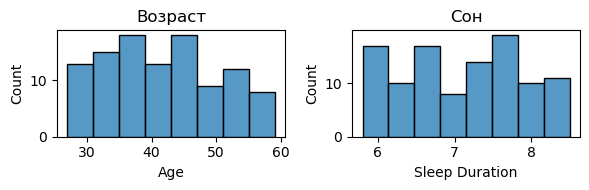

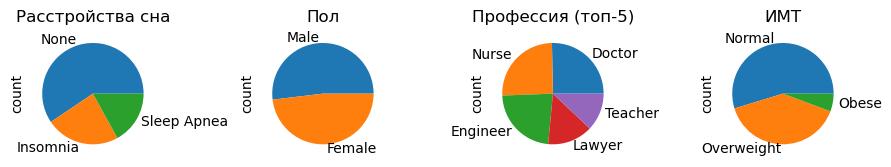

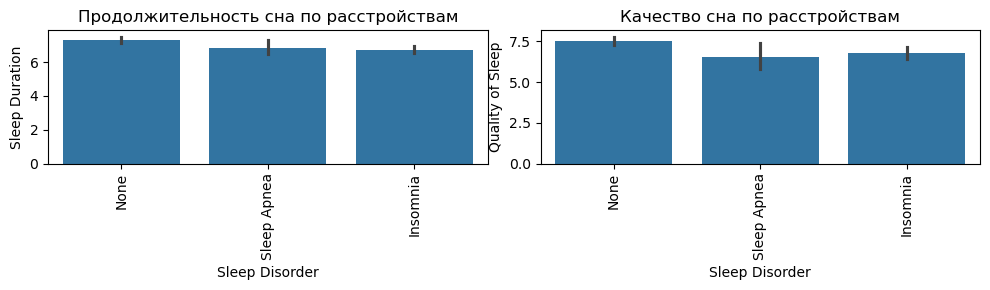

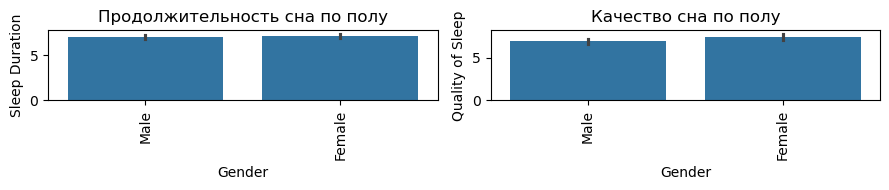

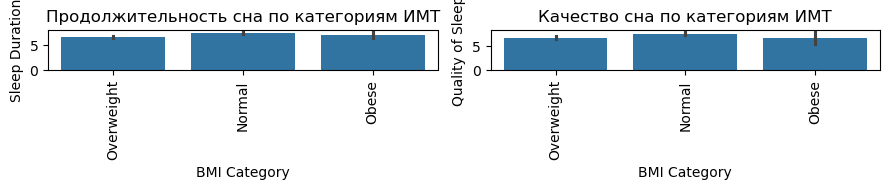

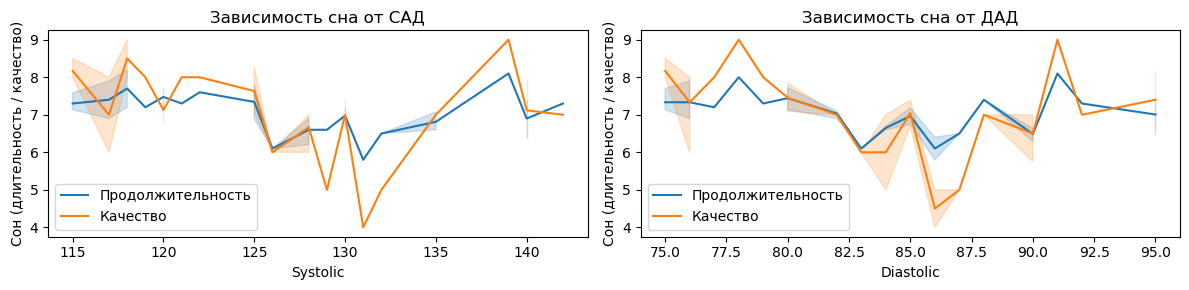

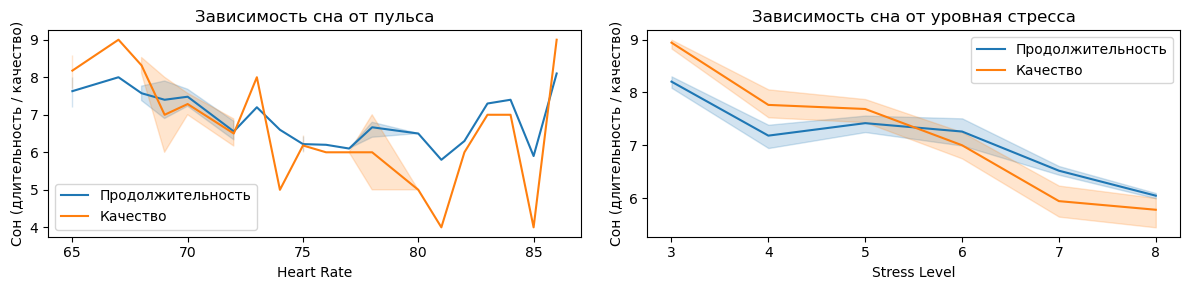

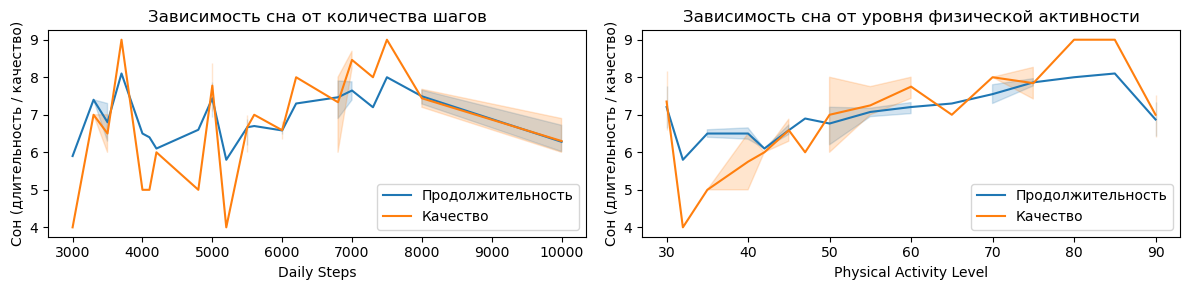

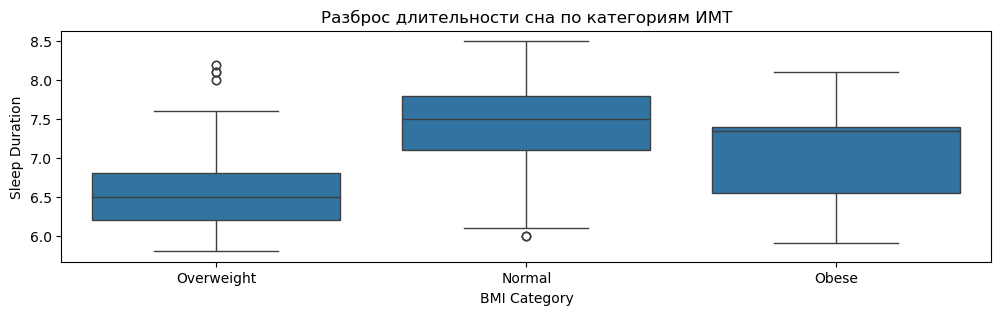

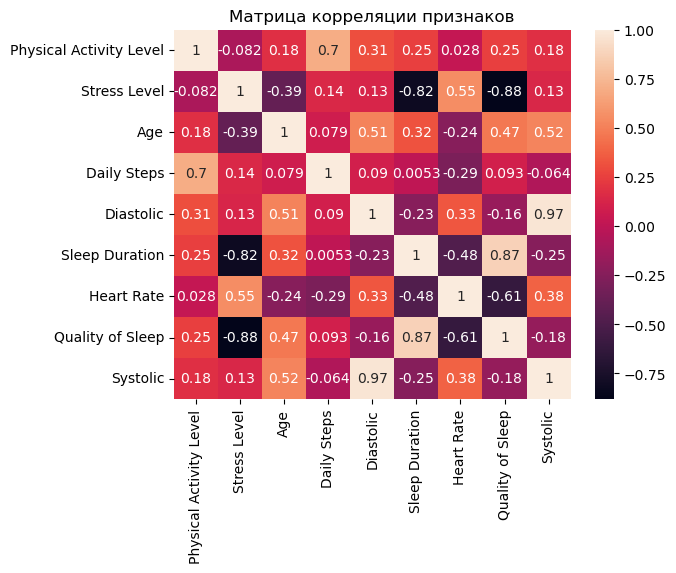

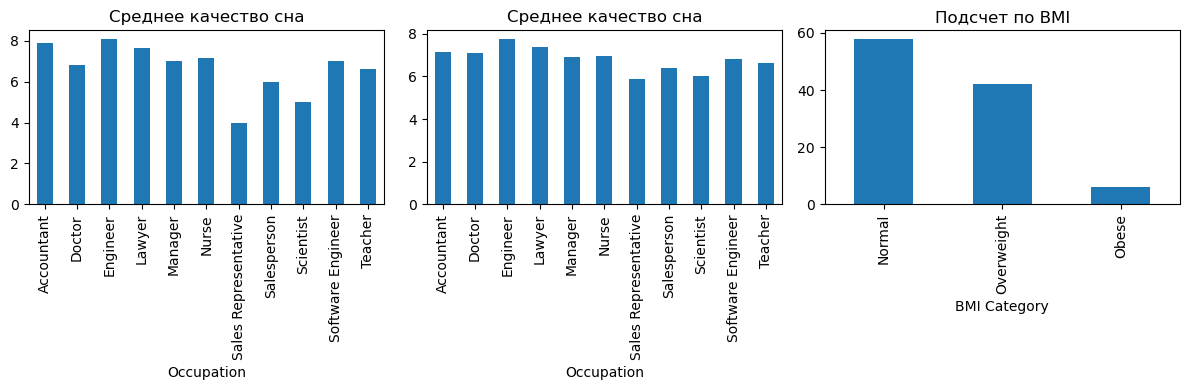

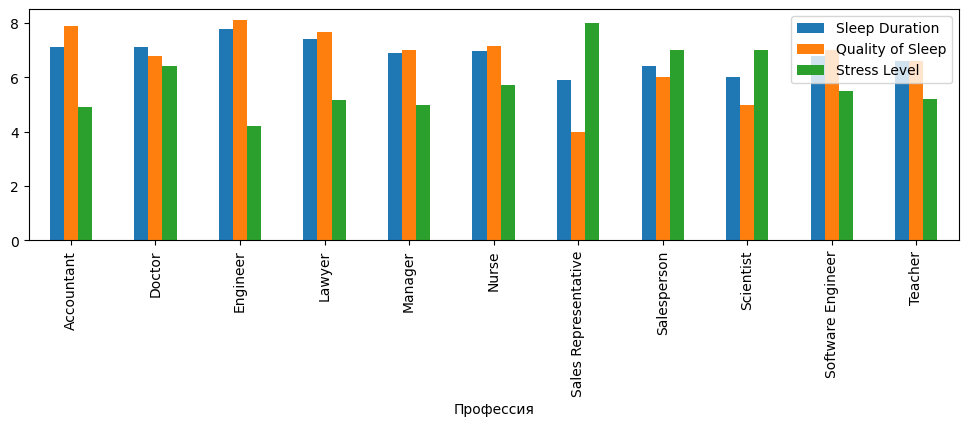

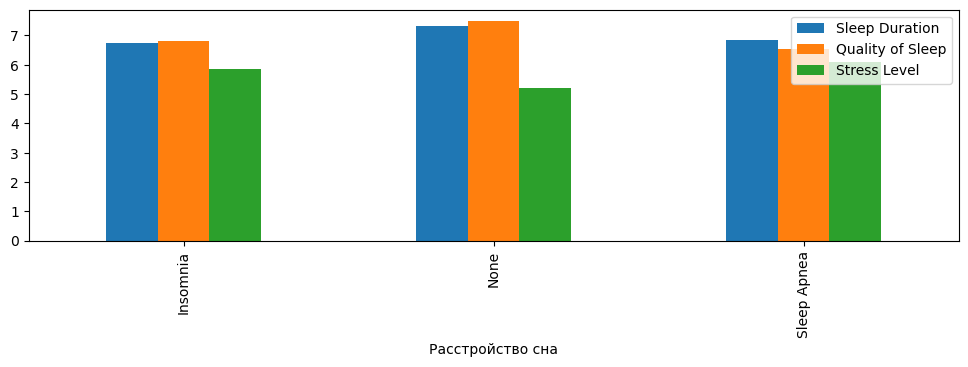

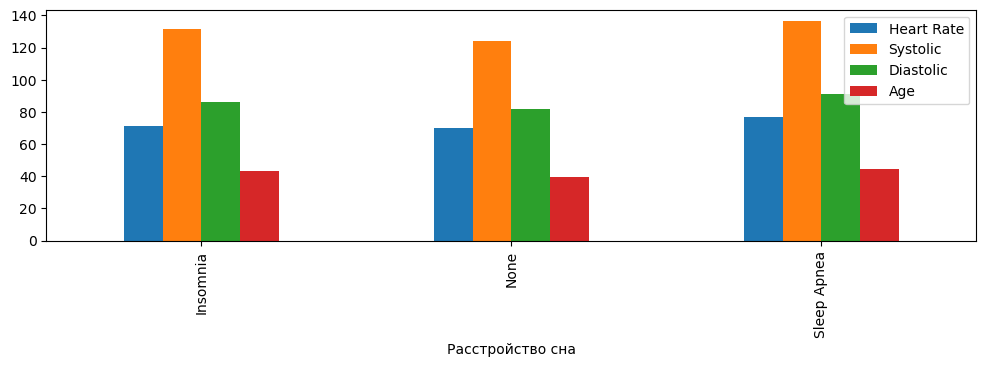

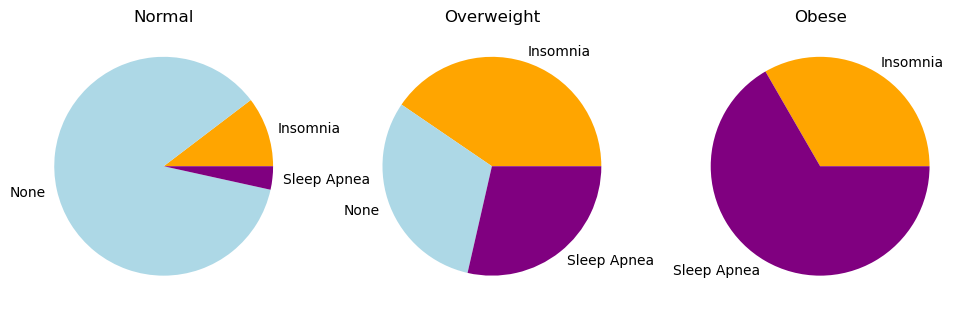

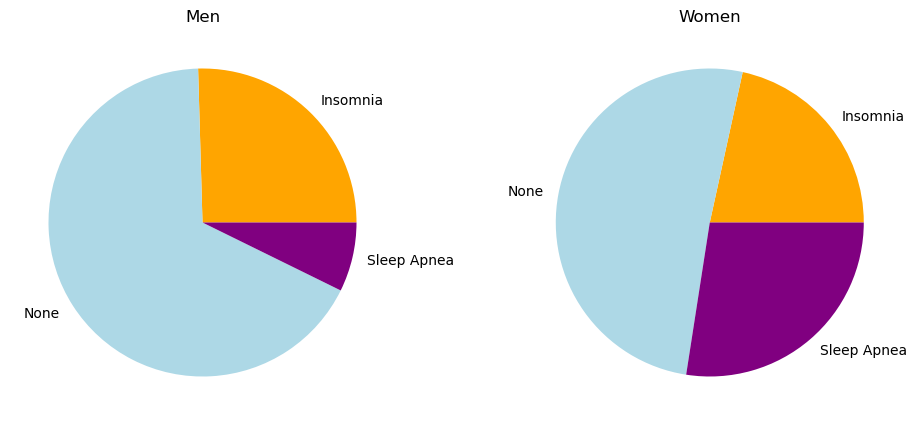

mean                                             \
                  Age       Daily Steps         Heart Rate         
Gender         Female  Male      Female    Male     Female  Male   
Sleep Disorder                                                     
Insomnia         46.3  41.1      6363.6  5785.7       67.5  73.9   
None             46.0  34.6      6550.0  7124.3       69.2  70.0   
Sleep Apnea      46.4  37.0      6971.4  3700.0       75.1  82.2   

                                                                count       \
               Physical Activity Level       Stress Level         Age        
Gender                          Female  Male       Female Male Female Male   
Sleep Disorder                                                               
Insomnia                          47.7  52.1          5.0  6.5     11   14   
None                              56.4  60.8          4.3  5.9     26   37   
Sleep Apnea                       68.7  52.5          6.2  5.8     14    4   

                                                                              \
               Daily Steps      Heart Rate      Physical Activity Level        
Gender              Female Male     Female Male                  Female Male   
Sleep Disorder                                                                 
Insomnia                11   14         11   14                      11   14   
None                    26   37         26   37                      26   37   
Sleep Apnea             14    4         14    4                      14    4   

                                  
               Stress Level       
Gender               Female Male  
Sleep Disorder                    
Insomnia                 11   14  
None                     26   37  
Sleep Apnea              14    4

In [56]:

# гистограмма
plt.figure(figsize=(6, 2))
plt.subplot(121)
sns.histplot(df['Age'])
plt.title('Возраст')

plt.subplot(122)
sns.histplot(df['Sleep Duration'])
plt.title('Сон')

plt.tight_layout()
plt.show()


# круговая диаграмма

plt.figure(figsize=(9, 2))

plt.subplot(141)
df['Sleep Disorder'].value_counts().plot(kind='pie')
plt.title('Расстройства сна')

plt.subplot(142)
df['Gender'].value_counts().plot(kind='pie')
plt.title('Пол')

plt.subplot(143)
df['Occupation'].value_counts().head(5).plot(kind='pie')
plt.title('Профессия (топ-5)')

plt.subplot(144)
df['BMI Category'].value_counts().plot(kind='pie')
plt.title('ИМТ')

plt.tight_layout()
plt.show()


# столбчатая диаграмма

plt.figure(figsize=(10, 3))

plt.subplot(121)
sns.barplot(x=df['Sleep Disorder'], y=df['Sleep Duration'])
plt.title('Продолжительность сна по расстройствам')
plt.xticks(rotation=90)

plt.subplot(122)
sns.barplot(x=df['Sleep Disorder'], y=df['Quality of Sleep'])
plt.title('Качество сна по расстройствам')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


plt.figure(figsize=(9, 2))

plt.subplot(121)
sns.barplot(x=df['Gender'], y=df['Sleep Duration'])
plt.title('Продолжительность сна по полу')
plt.xticks(rotation=90)

plt.subplot(122)
sns.barplot(x=df['Gender'], y=df['Quality of Sleep'])
plt.title('Качество сна по полу')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


plt.figure(figsize=(9, 2))

plt.subplot(121)
sns.barplot(x=df['BMI Category'], y=df['Sleep Duration'])
plt.title('Продолжительность сна по категориям ИМТ')
plt.xticks(rotation=90)

plt.subplot(122)
sns.barplot(x=df['BMI Category'], y=df['Quality of Sleep'])
plt.title('Качество сна по категориям ИМТ')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# линейный график

plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.title('Зависимость сна от САД')
sns.lineplot(y=df['Sleep Duration'], x=df['Systolic'], label='Продолжительность')
sns.lineplot(y=df['Quality of Sleep'], x=df['Systolic'], label='Качество')
plt.ylabel('Сон (длительность / качество)')

plt.subplot(122)
plt.title('Зависимость сна от ДАД')
sns.lineplot(y=df['Sleep Duration'], x=df['Diastolic'], label='Продолжительность')
sns.lineplot(y=df['Quality of Sleep'], x=df['Diastolic'], label='Качество')
plt.ylabel('Сон (длительность / качество)')

plt.tight_layout()
plt.show()



plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.title('Зависимость сна от пульса')
sns.lineplot(y=df['Sleep Duration'], x=df['Heart Rate'], label='Продолжительность')
sns.lineplot(y=df['Quality of Sleep'], x=df['Heart Rate'], label='Качество')
plt.ylabel('Сон (длительность / качество)')

plt.subplot(122)
plt.title('Зависимость сна от уровная стресса')
sns.lineplot(y=df['Sleep Duration'], x=df['Stress Level'], label='Продолжительность')
sns.lineplot(y=df['Quality of Sleep'], x=df['Stress Level'], label='Качество')
plt.ylabel('Сон (длительность / качество)')

plt.tight_layout()
plt.show()



plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.title('Зависимость сна от количества шагов')
sns.lineplot(y=df['Sleep Duration'], x=df['Daily Steps'], label='Продолжительность')
sns.lineplot(y=df['Quality of Sleep'], x=df['Daily Steps'], label='Качество')
plt.ylabel('Сон (длительность / качество)')

plt.subplot(122)
plt.title('Зависимость сна от уровня физической активности')
sns.lineplot(y=df['Sleep Duration'], x=df['Physical Activity Level'], label='Продолжительность')
sns.lineplot(y=df['Quality of Sleep'], x=df['Physical Activity Level'], label='Качество')
plt.ylabel('Сон (длительность / качество)')

plt.tight_layout()
plt.show()




# boxplot
plt.figure(figsize=(12, 3))
sns.boxplot(x=df['BMI Category'], y=df['Sleep Duration'])
plt.title('Разброс длительности сна по категориям ИМТ')
plt.show()

# heatmap
corr = df[list(numeric_columns)].corr()
sns.heatmap(corr, annot=True)
plt.title('Матрица корреляции признаков')
plt.show()





plt.figure(figsize=(12, 4))

plt.subplot(131)
df.groupby('Occupation')['Quality of Sleep'].mean().plot(kind='bar', title='Среднее качество сна')

plt.subplot(132)
df.groupby('Occupation')['Sleep Duration'].mean().plot(kind='bar', title='Среднее качество сна')

plt.subplot(133)
df['BMI Category'].value_counts().plot(kind='bar', title='Подсчет по BMI')

plt.tight_layout()
plt.show()



cols_to_show = ['Sleep Duration', 'Quality of Sleep', 'Stress Level']
df.groupby('Occupation')[cols_to_show].mean().plot(kind='bar', figsize=(12, 3))
plt.xlabel('Профессия')
plt.show()


cols_to_show = ['Sleep Duration', 'Quality of Sleep', 'Stress Level']
df.groupby('Sleep Disorder')[cols_to_show].mean().plot(kind='bar', figsize=(12, 3))
plt.xlabel('Расстройство сна')
plt.show()


cols_to_show = ['Heart Rate', 'Systolic', 'Diastolic', 'Age']
df.groupby('Sleep Disorder')[cols_to_show].mean().plot(kind='bar', figsize=(12, 3))
plt.xlabel('Расстройство сна')
plt.show()



plt.figure(figsize=(12, 5))

plt.subplot(131)
normal = df[df['BMI Category'] == 'Normal']
count = normal['Sleep Disorder'].value_counts().sort_index()
count.plot(kind='pie', colors=['orange', 'lightblue', 'purple'])
plt.title('Normal')
plt.ylabel('')
plt.title('Normal')

plt.subplot(132)
overweight = df[df['BMI Category'] == 'Overweight']
count = overweight['Sleep Disorder'].value_counts().sort_index()
count.plot(kind='pie', colors=['orange', 'lightblue', 'purple'])
plt.title('Overweight')
plt.ylabel('')

plt.subplot(133)
obese = df[df['BMI Category'] == 'Obese']
count = obese['Sleep Disorder'].value_counts().sort_index()
count.plot(kind='pie', colors=['orange', 'purple'])
plt.title('Obese')
plt.ylabel('')

plt.show()


plt.figure(figsize=(12, 5))

plt.subplot(121)
normal = df[df['Gender'] == 'Male']
count = normal['Sleep Disorder'].value_counts().sort_index()
count.plot(kind='pie', colors=['orange', 'lightblue', 'purple'])
plt.title('Men')
plt.ylabel('')


plt.subplot(122)
overweight = df[df['Gender'] == 'Female']
count = overweight['Sleep Disorder'].value_counts().sort_index()
count.plot(kind='pie', colors=['orange', 'lightblue', 'purple'])
plt.title('Women')
plt.ylabel('')

plt.show()



table = df.pivot_table(
    index='Sleep Disorder', 
    columns='Gender', 
    values=['Stress Level', 'Heart Rate', 'Age', 'Daily Steps', 'Physical Activity Level'], 
    aggfunc=['mean', 'count']
).round(1)

display(table)




АНАЛИЗ ДАННЫХ И ВЫВОДЫ

Данные представлены выборкой из 361 пациента. В данных имелось много (неявно) повторяющихся строк, такие строки были отброшены, после чего в выборке остались данные 106 уникальных пациентов. Наибольшее отклонение от среднего было зафиксировано в показателях пульса (до 2.99 сигма). Выбросов в числовых столбцах, превосходящих 3*сигма, зафиксировано не было, поэтому все данные были сохранены.

В выборке примерно в равной степени представлены мужчины и женщины, имеются представители различных профессий, пациенты с различными индексами массы тела. Доля здоровых людей составляет примерно 2/3, доли пациентов, страдающих апноэ или бессонницей - примерно по 1/6.

Продолжительность и качество сна у людей, страдающих расстройствами сна незначительно снижалось по сравнению со здоровыми людьми. Незначительность снижения продолжительности сна у лиц, страдающих бессоницей, сложно объяснить иначе как неточностью в соответствующих данных или несовершенными методами их сбора/интерпретации. Продолжительность и качество сна у мужчин и женщин существенно не различалась, у людей с лишним весом и ожирением несколько снижались оба показателя.

По линейным графикам  и тепловой карте наблюдается увеличение продолжительности и качества сна при более низких значениях артериального давления, пульса, уровня стресса и при более высоких показателях физической активности. Наиболее сильные (отрицательные) связи наблюдаются между показателями сна и уровнем стресса (-0.82 и -0.88) и пульсом (-0.48 и -0.61). На графике пульса наблюдается увеличеине продолжительности и качества сна при максимальных показателях пульса, что объясняется присутствием нескольких выбросов с экстремально высокими значениями пульса. Линейных связей показателей сна с числом шагов не наблюдается.

Наилучшие показатели сна наблюдаются у бухгалтеров, инженеров и юристов, самые плохие - у менеджеров по продажам и ученых.

Среди женщин расстройства сна встречались чаще, чем у мужчин за счет увеличения доли пациентов, страдающих апноэ. Данный факт сложно объяснить, поскольку апноэ встречается гораздо чаще у мужчин, чем у женщин.

Наиболее важным фактором, влияющим на распространенность заболеваний сна, является индекс массы тела. Так, среди людей с нормальной массой тела 
доля пациентов с расстройствами сна составляет примерно 1/6, у людей с повышенной массой тела - 2/3, у людей с ожирением (которых, было не очень много в выборке), достигает 100 процентов.
